In [28]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as mtp  
import pandas as pd  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
  
#importing datasets  
dataset= pd.read_csv('train_data2.csv') 
dataset.to_numpy()
  
#Extracting Independent and dependent Variable  
# Putting feature variable to X
#X = dataset.iloc[:, :11].values
# Putting response variable to y
#y = dataset.iloc[:, -1].values

# Putting feature variable to X
X = dataset.drop('stage',axis=1)
# Putting response variable to y
y = dataset['stage']

  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0) 
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)



#X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


(459, 11) (153, 11) (459,) (153,)


In [29]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(x_test)    

In [30]:
x_test

array([[ 1.3414181 ,  1.33339226,  1.03311047, ...,  0.37164194,
         0.12758756, -1.11585979],
       [-0.95911689, -0.95912385, -0.99114191, ..., -0.54399762,
        -1.16900335,  0.95201383],
       [ 1.66430051,  1.65733475,  1.66930408, ...,  1.19571754,
         0.9919815 , -0.89818889],
       ...,
       [-0.24363969, -0.23648291, -1.02516269, ..., -0.36086971,
        -1.38510184,  0.87945686],
       [-0.95911689, -0.95912385, -1.08753488, ..., -1.825893  ,
        -0.30460941,  0.98829231],
       [-0.59587492, -0.61026271, -0.73409437, ..., -1.73432904,
         0.34368604,  1.27852019]])

In [31]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators= 10, criterion="entropy")  

classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [32]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([4, 1, 4, 3, 1, 1, 3, 3, 0, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 3, 0, 1,
       1, 3, 0, 3, 0, 1, 0, 3, 3, 3, 3, 1, 0, 3, 3, 4, 3, 5, 1, 0, 1, 3,
       3, 3, 4, 0, 1, 3, 3, 3, 3, 2, 3, 0, 3, 3, 1, 0, 1, 0, 3, 2, 3, 2,
       0, 1, 4, 1, 1, 3, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 5, 1,
       3, 1, 0, 2, 1, 2, 0, 2, 1, 3, 0, 0, 3, 0, 1, 4, 3, 2, 3, 0, 1, 0,
       0, 3, 2, 1, 0, 4, 3, 4, 3, 3, 3, 0, 1, 0, 4, 3, 0, 3, 1, 0, 3, 3,
       3, 0, 4, 3, 1, 4, 2, 3, 1, 0, 1, 4, 3, 0, 0, 0, 4, 3, 0, 0, 0],
      dtype=int64)

In [33]:
%%time
classifier.fit(x_train, y_train)

CPU times: total: 31.2 ms
Wall time: 33 ms


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [34]:
print("Accuracy = ",accuracy_score(y_test, y_pred))

#https://www.javatpoint.com/machine-learning-random-forest-algorithm

Accuracy =  0.9019607843137255


In [35]:
#def mae(y_true, y_pred):
  #  return np.mean(abs(y_test - y_pred))

In [36]:
 for i in range(10):
    #Fitting Decision Tree classifier to the training set  
    from sklearn.ensemble import RandomForestClassifier  
    classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  

    classifier.fit(x_train, y_train)
    
    #Predicting the test set result  
    y_pred= classifier.predict(x_test)  
    y_pred
    
    #test predict
    classifier.predict([[27400, 84, 19087, 90, 12500.04, 90, 22000, 100, 68,29,-155]])
    
    print("Accuracy = ",accuracy_score(y_test, y_pred))
    print('MAE: %.3f' % mae(y_test, y_pred))

Accuracy =  0.9150326797385621
MAE: 0.098
Accuracy =  0.9084967320261438
MAE: 0.105
Accuracy =  0.8954248366013072
MAE: 0.118
Accuracy =  0.9084967320261438
MAE: 0.111
Accuracy =  0.9215686274509803
MAE: 0.092
Accuracy =  0.8758169934640523
MAE: 0.137
Accuracy =  0.9084967320261438
MAE: 0.098
Accuracy =  0.8954248366013072
MAE: 0.118
Accuracy =  0.9084967320261438
MAE: 0.111
Accuracy =  0.9281045751633987
MAE: 0.085


In [1]:
classifier(x_test)

NameError: name 'classifier' is not defined

In [42]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [43]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator= classifier ,
                           param_grid = params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [44]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 4.84 s
Wall time: 1min 48s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [45]:
grid_search.best_score_

0.9040999237223494

In [47]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

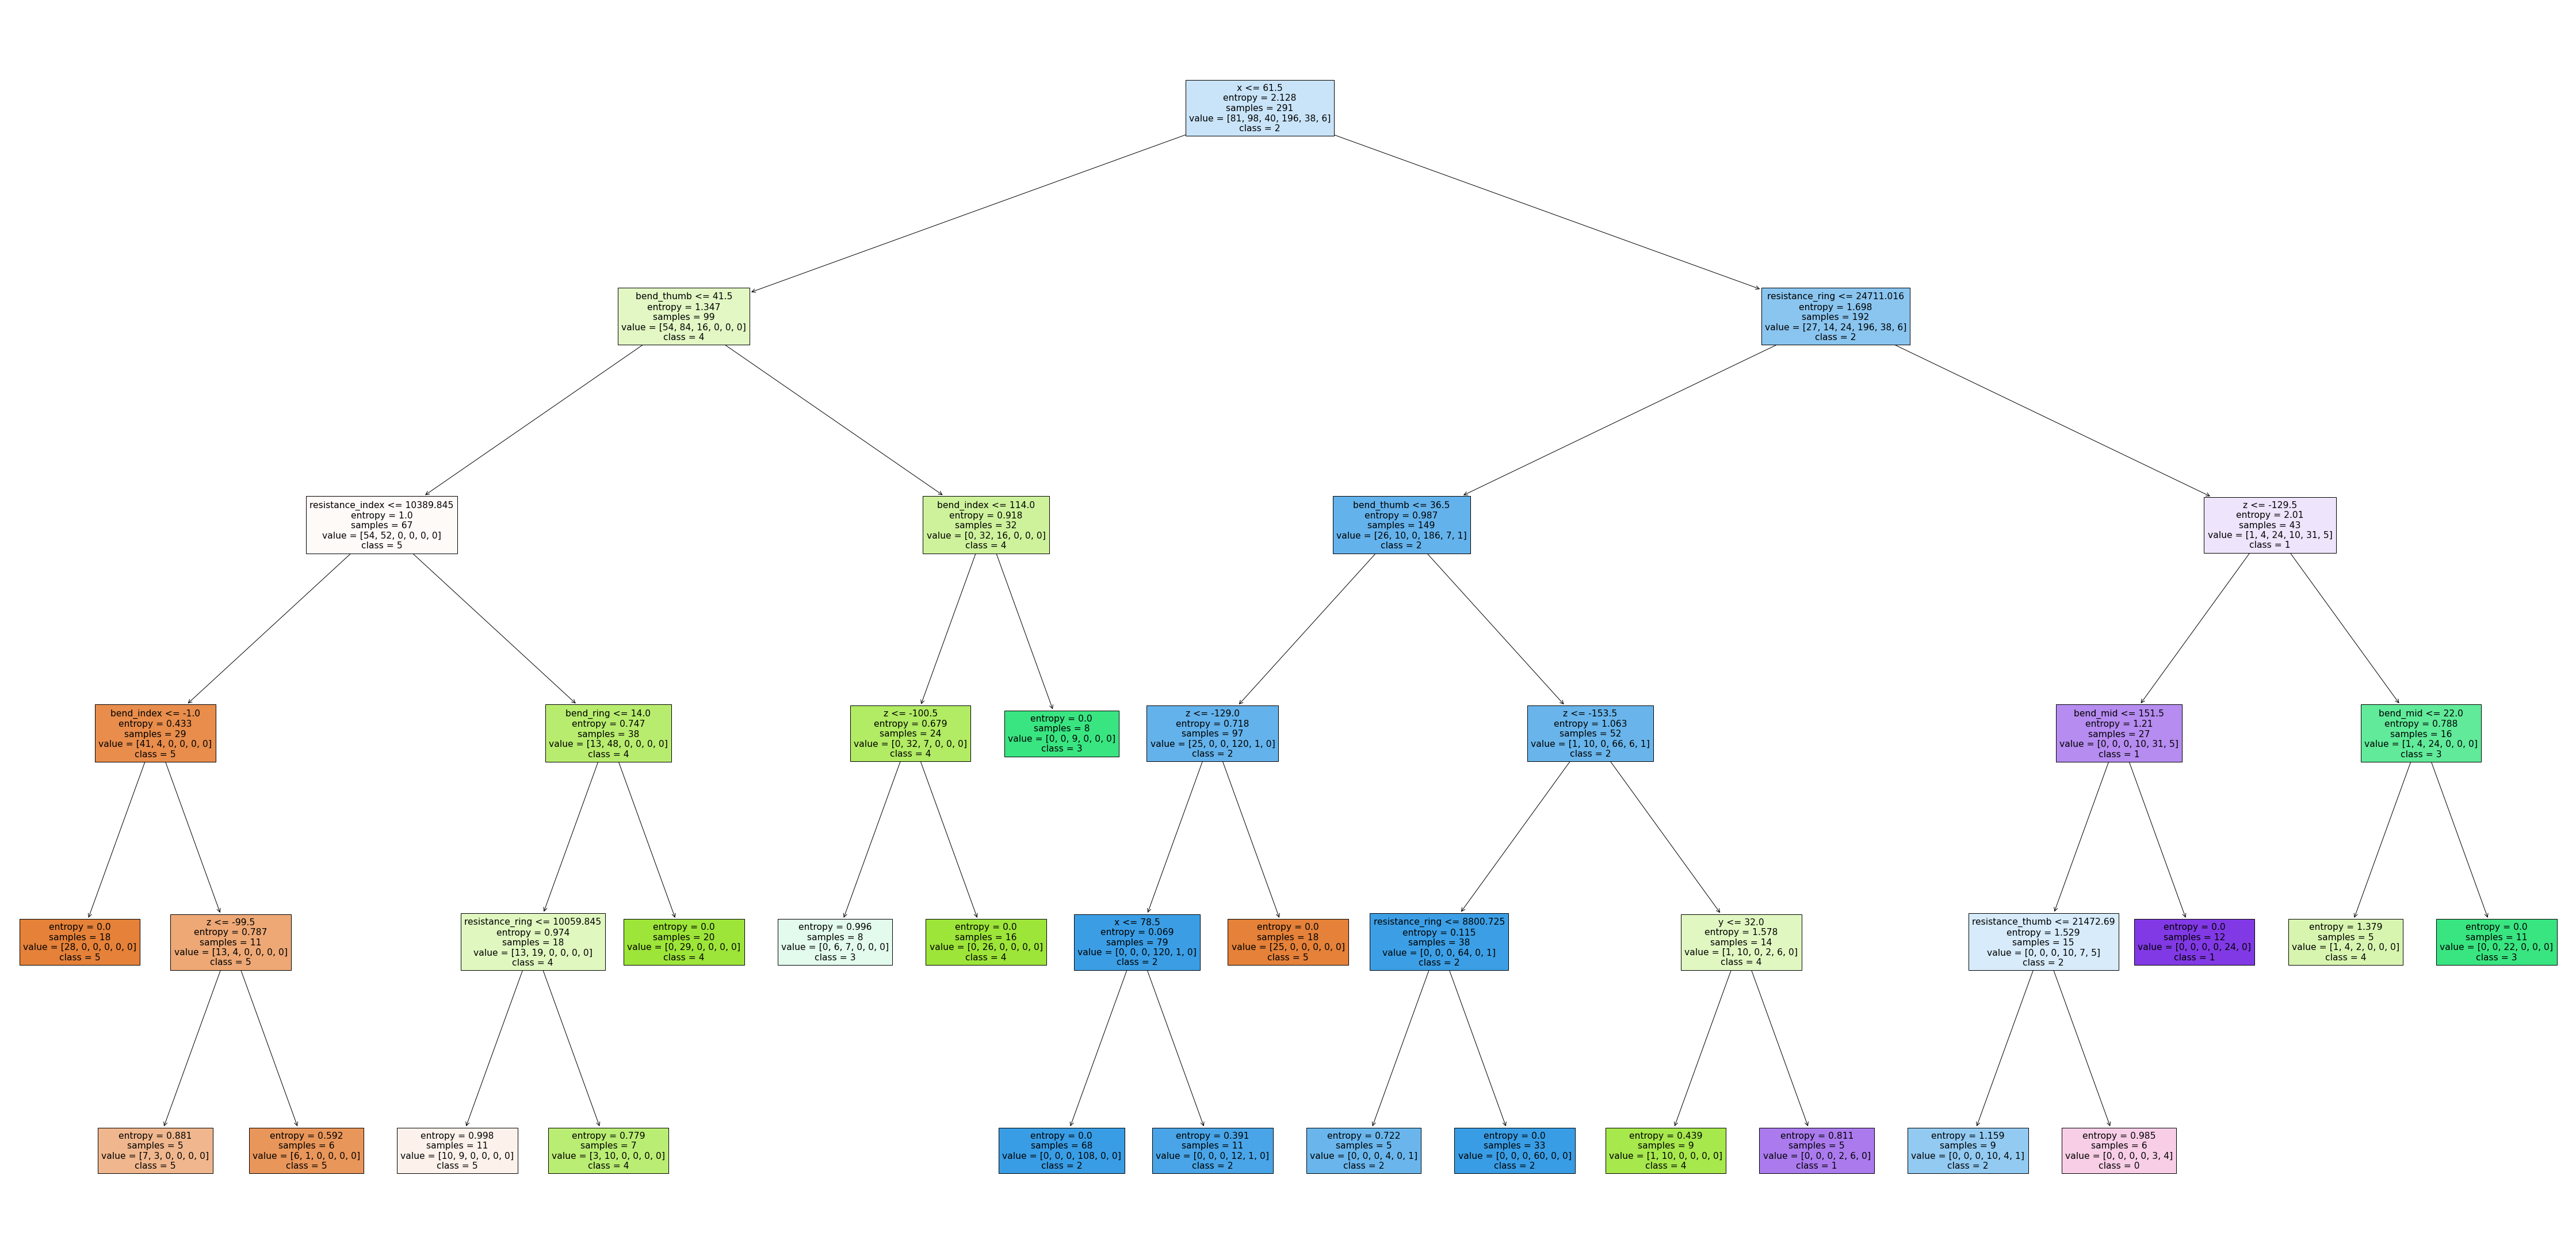

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns
          ,class_names=['5', '4', '3', '2', '1', '0'],filled=True);